이진분류를 나누는 형태
sklearn에 load를 제공하는 보편적인 방법
보팅분류기를 만들어서 test해봄


In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#voing안에 logi랑 kn 모델 사용
#데이터셋에서 데이터 가져오는 것
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
cancer = load_breast_cancer(as_frame=True) #Dimensionality = 컬럼수

In [3]:
cancer.data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
cancer.target.head(2)

0    0
1    0
Name: target, dtype: int32

In [5]:
cancer.target_names #악성 = 0, 양성 = 1

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from xgboost import XGBClassifier
from lightgbm import 

In [6]:
lr_clf = LogisticRegression(solver='liblinear') #모델만듦
knn_clf = KNeighborsClassifier(n_neighbors=8) #n_neighbors=5 : 점 5개를 잡고 지점에서 가까운 것끼리 분류 
vo_clf = VotingClassifier([('lr',lr_clf),('knn',knn_clf)],voting='soft') #튜플로 만듦
X_train,X_test,y_train,y_test = train_test_split(cancer.data,
                                                 cancer.target,
                                                 test_size=0.2,
                                                 random_state=156)
vo_clf.fit(X_train,y_train) #보팅분류기
pred = vo_clf.predict(X_test)
accuracy_score(y_test,pred) #묶어서 하는 것이 개별하는 것보다는 좋다. 뭐가 좋음?

0.956140350877193

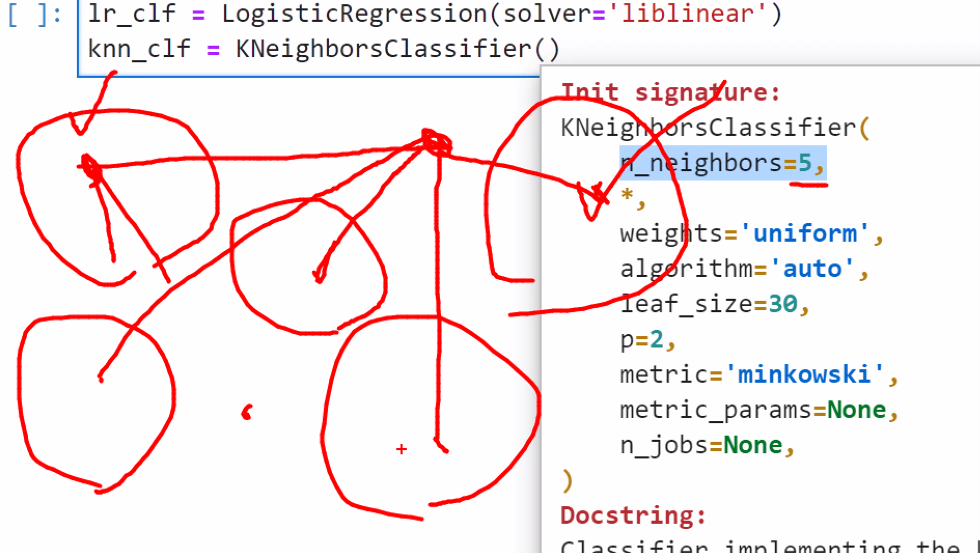
#n_neighbors=5 : 점 5개를 잡고 지점에서 가까운 것끼리 분류, 점들의 데이터들의 거리를 계산해서, 데이터를 하나가 있으면 데이터들과 점들의 거리를 계산을 해서 거리를 

데이터 들의 중심점으로 계산해서 더 이상 이동이 없을 때가지 계속 작업을 한다.

- vo_clf = VotingClassifier()
estimators : list of (str, estimator) tuples

In [7]:
models = [lr_clf,knn_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {accuracy_score(y_test,pred)}')

LogisticRegression 정확도 : 0.9473684210526315
KNeighborsClassifier 정확도 : 0.9385964912280702


C:\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


- 교재 215p
보팅 분류기가 정확도가 조금 높게 나타남.
결정트리알고리즘을 기반으로 한다. 
앙상블 학습에서 이 같은 결정 트리 알고리즘의 단점을 많은 분류기를 결합해 단점을 극복하고 있다.

### 랜덤포레스트
- 배깅
대표적으로 램덤 포레스트  
소프트부팅사용  

In [8]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

In [25]:
def get_new_df(old_df):
    
    dup_df = pd.DataFrame(data=old_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    dup_df = dup_df.reset_index()
    new_df = pd.merge(old_df.reset_index(), dup_df, how='outer')
    new_df['column_name'] = new_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis = 1)
    # if x[1]>0 이면 람다식 진행하고, else x[0]이면 x[0]을 출력하라!
    
    new_df.drop(columns=['index'], inplace=True)
    
    return new_df


def get_human_dataset():
    feature_name_df = pd.read_csv('human/human_activity/features.txt', 
            sep='\s+', 
            header=None, 
            names=['column_index','column_name'])
    
    name_df = get_new_df(feature_name_df)
    
    #fBodyAcc-bandsEnergy()-1,8_1을 추출해서 column으로 사용
    feature_name = name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('human/human_activity/train/X_train.txt',sep='\s+',names=feature_name) #sep='\s+' : 공백으로 구분
    X_test = pd.read_csv('human/human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    y_train = pd.read_csv('human/human_activity/train/y_train.txt',sep='\s+',names=['action'])
    y_test = pd.read_csv('human/human_activity/test/y_test.txt',sep='\s+',names=['action'])
    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [27]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

C:\Users\user\AppData\Local\Temp\ipykernel_11632\1442801055.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)


0.9253478113335596

- 교재 218p 오타

디폴트는 10개  -> 100개

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
params = {
    'max_depth':[8,16,24],
    'min_samples_split':[2,8,16],
    'min_samples_leaf':[1, 6, 12], #딕셔너리라서 :사용
}

In [48]:
%%time
rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1) #n_jobs=-1 : 전부다 쓰겠다
grid_cv = GridSearchCV(rf_clf,params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

C:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Wall time: 33.9 s


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [8, 16, 24],
                         'min_samples_leaf': [1, 6, 12],
                         'min_samples_split': [2, 8, 16]})

In [49]:
grid_cv.best_params_


{'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 2}

In [50]:
grid_cv.best_score_

0.9164853101196953

In [51]:
rf_clf = RandomForestClassifier(random_state=0,max_depth=16,min_samples_leaf=6,min_samples_split=2)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy_score(y_test,pred)

C:\Users\user\AppData\Local\Temp\ipykernel_11632\795056095.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train,y_train)


0.9260264675941635

-교재 210p 피처 중요도 그래프
-교재 221p 그래프 

### GBM(Gradient Boosting Machine)
순차적으로 처리하기 때문에 병렬처리를 해줘야 한다. 
앞쪽에서 학습하고 잘못 학습된 
데이터에 가중치를 부여하면서 오류를 개선해 나가면서 학습하는 방식이다.

- 에이다 부스트는
오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다.

- 교재 222p
- 피처 데이터 세트
+,-기호를 분류하고자 한다.
잘못 분류된 데이터에 가중치를 부여한다.
더 크게 그려진 이유는 가중치가 부여되서
순차적으로 진행한다.

gbm도 에이다부스트와 유사하다.  가중치 업데이트를 경사 하강법을 이용한다.